### Using rPPG method to estimate Beats Per Minute (BPM) from  a video input

In [81]:
'''Program to extract specific ROIs from the video frame. 
Compute the average values of color channels for the selected ROIs.

Mediapipe library is used to detect the face landmarks'''

import cv2
import mediapipe as mp
import time
import numpy as np
import matplotlib.pyplot as plt
from itertools import zip_longest

# Initialize MediaPipe Face Mesh
mp_face_mesh = mp.solutions.face_mesh
face_mesh = mp_face_mesh.FaceMesh(
    static_image_mode=False,
    max_num_faces=1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

# Drawing utility
#mp_drawing = mp.solutions.drawing_utils

# Load the video file
video_path = "dataset/UBFC_PHYS/s3/vid_s3_T1.avi"

cap = cv2.VideoCapture(video_path)

# Get the frames per second (fps) of the video
fps = cap.get(cv2.CAP_PROP_FPS)

# Get the total number of frames in the video
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

#ROI loction points according to the paper by F.Haugg et al. (added additional points in each case)
landmark_head = [107, 66, 69, 67, 109, 10, 338, 297, 299, 296, 336, 9]
landmark_lcheek = [118, 119, 120, 47, 126, 209, 49, 129, 203, 205, 50]
landmark_rcheek = [347, 348, 349, 277, 355, 429, 279, 358, 423, 425, 280]

#Initialise the list of color channels
avg_b = []
avg_g = []
avg_r = []

"""Set the time durtation of video you want to """
#To set the total time duration of video interested in
time_period = 20   #seconds
#Set the value (= total frame - to perform for full length or 0 for any specific time duration)
f_count =  total_frames
#f_count =  0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame with MediaPipe Face Mesh
    results = face_mesh.process(rgb_frame)
    #print(len(results.multi_face_landmarks))

    # Extract the values of specific ROI with respect to landmark position points
    if results.multi_face_landmarks:
        for face_landmarks in results.multi_face_landmarks:
            #print(len(face_landmarks.landmark))
            '''
            # Extracting landmark coordinates
            h, w, _ = frame.shape
            landmark_coords = []
            for landmark in face_landmarks.landmark:
                x = int(landmark.x * w)
                y = int(landmark.y * h)
                z = landmark.z
                landmark_coords.append((x, y, z))
            '''
            # Extracting specific landmark coordinates
            h, w, _ = frame.shape
            landmark_coords_head = []
            landmark_coords_lcheek = []
            landmark_coords_rcheek = []

            for i, j, k in zip_longest(landmark_head, landmark_lcheek, landmark_rcheek, fillvalue = None):

                if i is not None:
                    landmark_h = face_landmarks.landmark[i]
                    x = int(landmark_h.x * w)
                    y = int(landmark_h.y * h)
                    landmark_coords_head.append((x, y))
                    #Mark the landamrk points on the image frame
                    cv2.circle(frame, (x, y), radius=1, color=(0, 0, 0), thickness=1)
                
                if j is not None:

                    landmark_lc = face_landmarks.landmark[j]
                    x1 = int(landmark_lc.x * w)
                    y1 = int(landmark_lc.y * h)
                    landmark_coords_lcheek.append((x1, y1))
                    #Mark the landamrk points on the image frame
                    cv2.circle(frame, (x1, y1), radius=1, color=(0, 0, 0), thickness=1)
                
                if k is not None:

                    landmark_rc = face_landmarks.landmark[k]
                    x2 = int(landmark_rc.x * w)
                    y2 = int(landmark_rc.y * h)
                    landmark_coords_rcheek.append((x2, y2))
                    #Mark the landamrk points on the image frame
                    cv2.circle(frame, (x2, y2), radius=1, color=(0, 0, 0), thickness=1)
                

            # Determine the bounding box around the specified landmarks -
            # Forehead
            x_coords, y_coords = zip(*landmark_coords_head)
            x_min, x_max = max(0, min(x_coords)), min(w, max(x_coords))
            y_min, y_max = max(0, min(y_coords)), min(h, max(y_coords))
            # ROI
            forehead_roi = frame[y_min:y_max, x_min:x_max]
            forehead_blue = np.mean(forehead_roi[:, :, 0])
            forehead_green = np.mean(forehead_roi[:, :, 1])
            forehead_red = np.mean(forehead_roi[:, :, 2])

            #lcheek
            x_coords, y_coords = zip(*landmark_coords_lcheek)
            x_min, x_max = max(0, min(x_coords)), min(w, max(x_coords))
            y_min, y_max = max(0, min(y_coords)), min(h, max(y_coords))
            # ROI
            lcheek_roi = frame[y_min:y_max, x_min:x_max]
            lcheek_blue = np.mean(lcheek_roi[:, :, 0])
            lcheek_green = np.mean(lcheek_roi[:, :, 1])
            lcheek_red = np.mean(lcheek_roi[:, :, 2])

            #rcheek
            x_coords, y_coords = zip(*landmark_coords_rcheek)
            x_min, x_max = max(0, min(x_coords)), min(w, max(x_coords))
            y_min, y_max = max(0, min(y_coords)), min(h, max(y_coords))
            # ROI
            rcheek_roi = frame[y_min:y_max, x_min:x_max]
            rcheek_blue = np.mean(rcheek_roi[:, :, 0])
            rcheek_green = np.mean(rcheek_roi[:, :, 1])
            rcheek_red = np.mean(rcheek_roi[:, :, 2])

            # Crop the image
            #cropped_image = frame[y_min:y_max, x_min:x_max]
           
            #average = np.mean(forehead_roi[:, :, 0], lcheek_roi[:, :, 0], rcheek_roi[:, :, 0])
            #print(forehead_red, lcheek_red, rcheek_red)
            
            avg_r.append(np.mean([forehead_red, lcheek_red, rcheek_red]))
            avg_g.append(np.mean([forehead_green, lcheek_green, rcheek_green]))
            avg_b.append(np.mean([forehead_blue, lcheek_blue, rcheek_blue]))

            #r, g, b = frame[y_min:y_max, x_min:x_max]
            #print(f"R G B values are : {avg_r}, {avg_g}, {avg_b}")
            '''
            # Display the cropped image in a separate window
            cv2.namedWindow("Cropped_Image", cv2.WINDOW_NORMAL) 
            cv2.resizeWindow("Cropped_Image", 400,200)
            cv2.imshow('Cropped_Image', cropped_image)
            '''
    # Display the frame
    cv2.namedWindow("Face Landmarks", cv2.WINDOW_NORMAL) 
    cv2.resizeWindow("Face Landmarks", 900,650)
    cv2.imshow('Face Landmarks', frame)
    # Exit if the 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
    # To retrieve no. of frames according to the specified time duration
    if f_count == total_frames:
        continue
    else:
    
        if(f_count/fps >= time_period):
            print("Current frame counts :",f_count)
            break
        else:
            f_count+=1
        
    
print("Total No. of vid frames: ", total_frames)
print("Video FPS: ", fps)

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()
face_mesh.close()


f:\Techlabs\Deepfake\code\.venv-techlabs\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Current frame counts : 703
Total No. of vid frames:  6326
Video FPS:  35.138


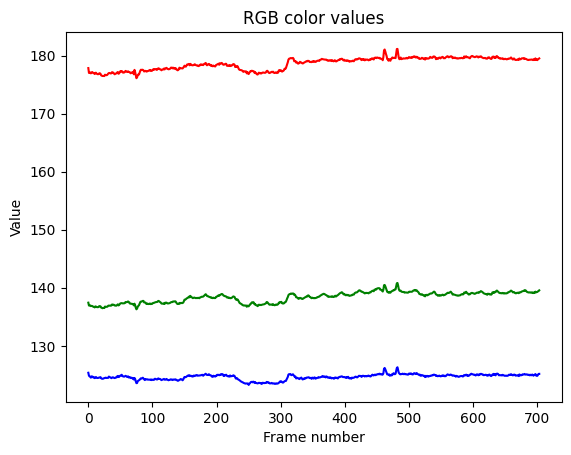

In [82]:
#Plot the color channel values
plt.plot(avg_g, color = 'green')
plt.plot(avg_b, color = 'blue')
plt.plot(avg_r, color = 'red')
plt.title("RGB color values")
plt.xlabel('Frame number')
plt.ylabel('Value')
plt.show()


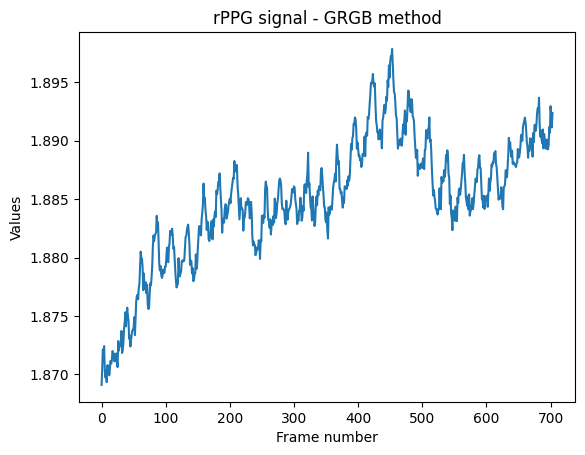

In [83]:
# Calculate the GR-GB values of the frames
#Implementation of the method mentioned in paper by F.Haugg et al.
gr_signal = [a/b for a, b in zip(avg_g, avg_r)]

gb_signal = [a/b for a, b in zip(avg_g, avg_b)]

grgb_signal = [a + b for a , b in zip(gr_signal, gb_signal)]

#Plot the rPPG values against total number of frames
plt.plot(grgb_signal)
plt.title("rPPG signal - GRGB method")
plt.xlabel('Frame number')
plt.ylabel('Values')
plt.show()

In [84]:
"""
# Execute this code block only to save the rppg data to csv file
import csv

csv_fname = " sub4_raw_rppg.csv"
#Save the filtered signal data to csv file in respective directory
with open(csv_fname, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for value in grgb_signal:
        writer.writerow([value])
"""

'\n# Execute this code block only to save the rppg data to csv file\nimport csv\n\ncsv_fname = " sub4_raw_rppg.csv"\n#Save the filtered signal data to csv file in respective directory\nwith open(csv_fname, \'w\', newline=\'\') as csvfile:\n    writer = csv.writer(csvfile)\n    for value in grgb_signal:\n        writer.writerow([value])\n'

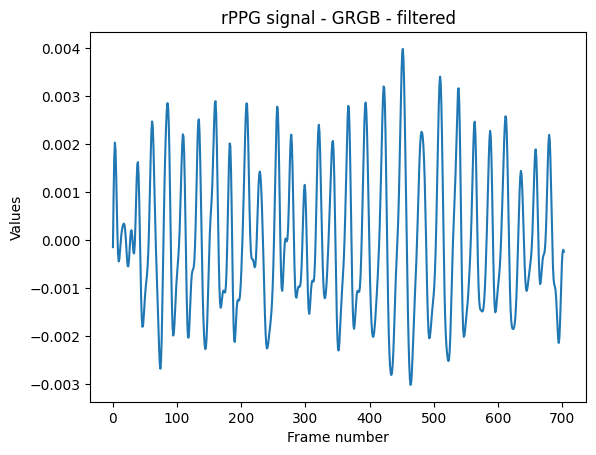

In [85]:
# Apply bandpass filter to isolate the heart rate frequency range (0.5 to 4 Hz)
#The parameter values matches with that mentioned in the paper "pyVHR.." by G. Boccignone et al.
from scipy.signal import butter, filtfilt

fs = fps #25  # Sample rate (The fps for the video)
lowcut = 0.5  # Lower bound of the heart rate frequency range
highcut = 4.0  # Upper bound of the heart rate frequency range

# Function to apply bandpass filter
def bandpass_filter(data, lowcut, highcut, fs, order=6):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band') 
    y = filtfilt(b, a, data)
    return y

filtered_rppg_signal = bandpass_filter(grgb_signal, lowcut, highcut, fs)
#Plot the rPPG values against total number of frames
plt.plot(filtered_rppg_signal)
plt.title("rPPG signal - GRGB - filtered")
plt.xlabel('Frame number')
plt.ylabel('Values')
plt.show()

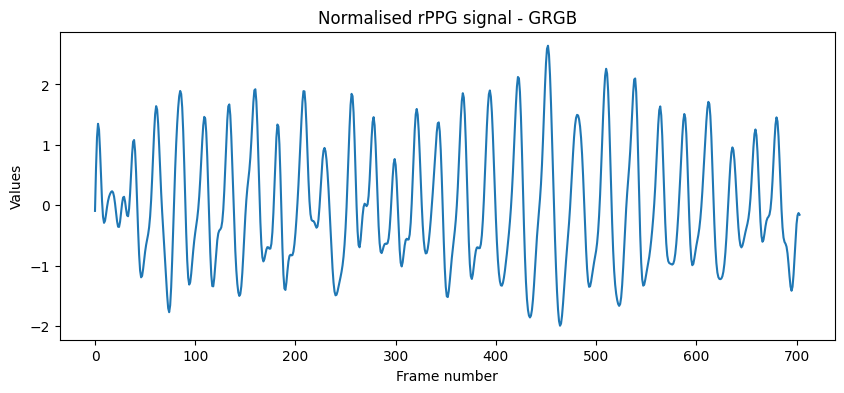

In [86]:
# Normalization
# Normalize the RGB values using z-score normalisation
# Normalised value = (value-mean)/standard deviation
norm_rppg_signal = (filtered_rppg_signal - np.mean(filtered_rppg_signal)) / np.std(filtered_rppg_signal)
#Plot the rPPG values against total number of frames
plt.figure(figsize=(10,4))
plt.plot(norm_rppg_signal)
plt.title("Normalised rPPG signal - GRGB")
plt.xlabel('Frame number')
plt.ylabel('Values')
plt.show()

In [87]:
"""
# Execute this code block only to save the normalised rppg data to csv file
import csv

csv_fname = " "
#Save the filtered signal data to csv file in respective directory
    with open(csv_fname, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        for value in norm_rppg_signal:
            writer.writerow([value])
"""

'\n# Execute this code block only to save the normalised rppg data to csv file\nimport csv\n\ncsv_fname = " "\n#Save the filtered signal data to csv file in respective directory\n    with open(csv_fname, \'w\', newline=\'\') as csvfile:\n        writer = csv.writer(csvfile)\n        for value in norm_rppg_signal:\n            writer.writerow([value])\n'

In [88]:
# Method 1- Estimating the BPM from filtered rPPG signal 
# Detect peaks in the filtered rPPG signal to estimate the heart rate

from scipy.signal import find_peaks

peaks, _ = find_peaks(norm_rppg_signal, distance=fs/2)  # Minimum distance between peaks
peak_intervals = np.diff(peaks) / fs  # Time intervals between peaks in seconds
heart_rate = 60.0 / np.mean(peak_intervals)  # Convert to beats per minute (bpm)

print(f"Estimated Heart Rate: {heart_rate:.2f} bpm")


Estimated Heart Rate: 84.45 bpm


704


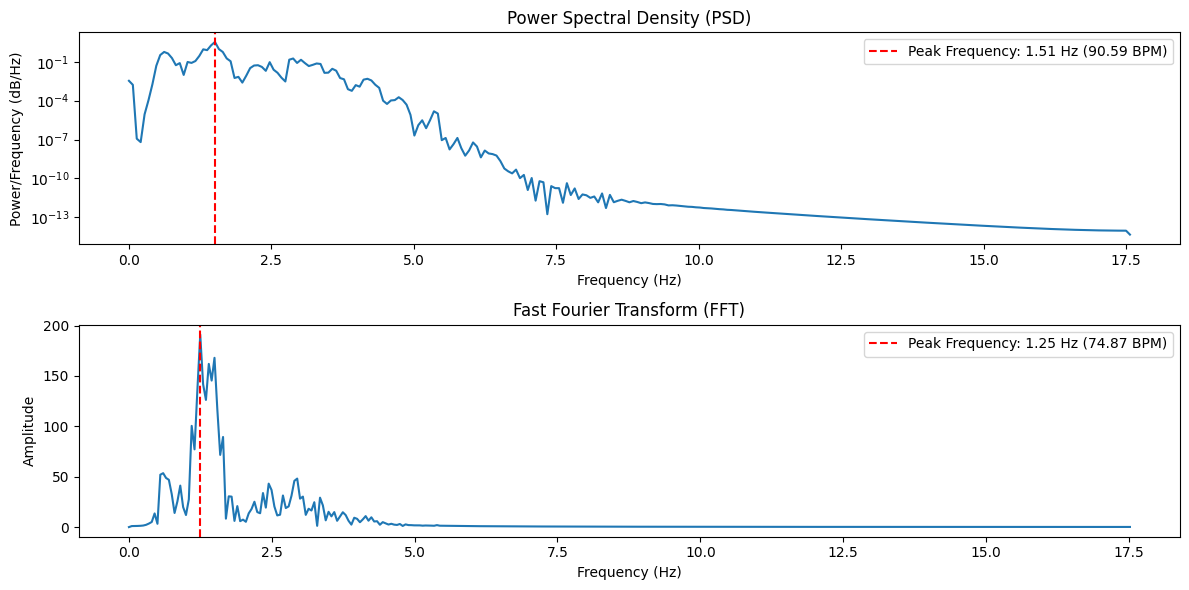

Estimated Heart Rate from PSD: 90.59 bpm
Estimated Heart Rate from FFT: 74.87 bpm


In [89]:
# Method 2- Estimating the BPM from Fast Fourier Transform(FFT) and Power Spectral Density(PSD) plot

from scipy.signal import welch

# Compute and plot the PSD.......................
frequencies_psd, psd = welch(norm_rppg_signal, fs, nperseg=512)

# Find the peak frequency in the PSD within the heart rate range
peak_freq_psd = frequencies_psd[np.argmax(psd)]
bpm_psd = peak_freq_psd * 60

# Compute and plot the FFT.............................
n = len(norm_rppg_signal)
print(n)
frequencies_fft = np.fft.fftfreq(n, 1/fs)
fft_values = np.fft.fft(norm_rppg_signal)
fft_amplitude = np.abs(fft_values)

# Find the peak frequency in the FFT within the heart rate range
heart_rate_range = (frequencies_fft >= 0.5) & (frequencies_fft <= 4.0)
peak_freq_fft = frequencies_fft[heart_rate_range][np.argmax(fft_amplitude[heart_rate_range])]
bpm_fft = peak_freq_fft * 60

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.semilogy(frequencies_psd, psd)
plt.title('Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.axvline(x=peak_freq_psd, color='r', linestyle='--', label=f'Peak Frequency: {peak_freq_psd:.2f} Hz ({bpm_psd:.2f} BPM)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(frequencies_fft[:n//2], fft_amplitude[:n//2])  # Only plot the positive frequencies
plt.title('Fast Fourier Transform (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.axvline(x=peak_freq_fft, color='r', linestyle='--', label=f'Peak Frequency: {peak_freq_fft:.2f} Hz ({bpm_fft:.2f} BPM)')
plt.legend()

plt.tight_layout()
plt.show() 

print(f"Estimated Heart Rate from PSD: {bpm_psd:.2f} bpm")
print(f"Estimated Heart Rate from FFT: {bpm_fft:.2f} bpm")

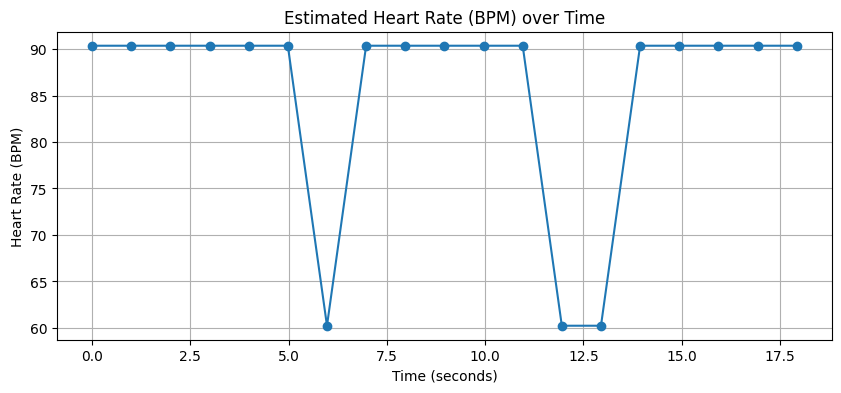

In [90]:
# Estimate the BPM from normalized rPPG signal using sliding window and Welch's method

from scipy.signal import welch

def calculate_bpm_over_time(rppg_signal, fs, window_length, step_size):
    bpm_values = []
    time_stamps = []
    window_samples = int(window_length * fs)
    step_samples = int(step_size * fs)
    
    for start in range(0, len(rppg_signal) - window_samples + 1, step_samples):
        segment = rppg_signal[start:start + window_samples]
        
        # Compute PSD using Welch's method
        ''' nperseg = step_samples, if you need overlapping regions '''
        freqs, psd = welch(segment, fs, nperseg=window_samples)
        
        # Limit the frequency range to typical heart rate range (0.5 to 4 Hz)
        valid_idx = np.logical_and(freqs >= 0.5, freqs <= 4.0)
        valid_freqs = freqs[valid_idx]
        valid_psd = psd[valid_idx]
        
        # Find the peak frequency in the valid range
        peak_freq = valid_freqs[np.argmax(valid_psd)]
        
        # Convert the peak frequency to BPM
        bpm = peak_freq * 60
        bpm_values.append(bpm)
        time_stamps.append(start / fs)
    
    return time_stamps, bpm_values


# Calculate BPM from the rPPG signal using a 2-second window with a 1-second step
window_length = 2  # seconds
step_size = 1  # seconds

time_stamps, bpm_values_est = calculate_bpm_over_time(norm_rppg_signal, fs, window_length, step_size)

# Plotting the BPM values over time
plt.figure(figsize=(10, 4))
plt.plot(time_stamps, bpm_values_est, marker='o')
plt.title('Estimated Heart Rate (BPM) over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Heart Rate (BPM)')
plt.grid(True)
plt.show()


### To estimate the BPM from ground truth data txt file............................................

In [45]:
'''
#The ground truth txt file is accessed from the UBFC_2 dataset from Kaggle

import numpy as np
import matplotlib.pyplot as plt

# Load the data from the file
file_path = 'dataset/UBFC_2_real/subject3/ground_truth.txt'
#file_path = 'dataset/original/subject10/ground_truth.txt'
#file_path = 'dataset/UBFC_PHYS/s10/ground_truth.txt'
data = np.loadtxt(file_path)

# Convert the numpy array to a list
txt_signal = data.tolist()
#Extract the list of data
ref_signal = txt_signal[1]
#ref_signal = ref_signal[0:1521]
print(len(ref_signal))

#Plot the ground truth data  
plt.figure(figsize=(10,4))
plt.plot(ref_signal, label='Heart Rate Signal')
plt.xlabel('Frame numbers')
plt.ylabel('Heart Rate Value')
plt.title('Heart Rate Signal Over Time')
plt.legend()
plt.show()
'''

"\n#The ground truth txt file is accessed from the UBFC_2 dataset from Kaggle\n\nimport numpy as np\nimport matplotlib.pyplot as plt\n\n# Load the data from the file\nfile_path = 'dataset/UBFC_2_real/subject3/ground_truth.txt'\n#file_path = 'dataset/original/subject10/ground_truth.txt'\n#file_path = 'dataset/UBFC_PHYS/s10/ground_truth.txt'\ndata = np.loadtxt(file_path)\n\n# Convert the numpy array to a list\ntxt_signal = data.tolist()\n#Extract the list of data\nref_signal = txt_signal[1]\n#ref_signal = ref_signal[0:1521]\nprint(len(ref_signal))\n\n#Plot the ground truth data  \nplt.figure(figsize=(10,4))\nplt.plot(ref_signal, label='Heart Rate Signal')\nplt.xlabel('Frame numbers')\nplt.ylabel('Heart Rate Value')\nplt.title('Heart Rate Signal Over Time')\nplt.legend()\nplt.show()\n"

In [46]:
'''
# Method 1- Estimating the BPM from filtered rPPG signal 
# Detect peaks in the filtered rPPG signal to estimate the heart rate

from scipy.signal import find_peaks

fs=fps
peaks, _ = find_peaks(ref_signal, distance=fs/2)  # Minimum distance between peaks
peak_intervals = np.diff(peaks) / fs  # Time intervals between peaks in seconds
heart_rate = 60.0 / np.mean(peak_intervals)  # Convert to beats per minute (bpm)

print(f"Estimated Heart Rate: {heart_rate:.2f} bpm")
'''

'\n# Method 1- Estimating the BPM from filtered rPPG signal \n# Detect peaks in the filtered rPPG signal to estimate the heart rate\n\nfrom scipy.signal import find_peaks\n\nfs=fps\npeaks, _ = find_peaks(ref_signal, distance=fs/2)  # Minimum distance between peaks\npeak_intervals = np.diff(peaks) / fs  # Time intervals between peaks in seconds\nheart_rate = 60.0 / np.mean(peak_intervals)  # Convert to beats per minute (bpm)\n\nprint(f"Estimated Heart Rate: {heart_rate:.2f} bpm")\n'

In [47]:
'''
# Method 2- Estimating the BPM from Fast Fourier Transform(FFT) and Power Spectral Density(PSD) plot

from scipy.signal import welch

# Compute and plot the PSD.......................
frequencies_psd, psd = welch(ref_signal, fs, nperseg=128)

# Find the peak frequency in the PSD within the heart rate range
peak_freq_psd = frequencies_psd[np.argmax(psd)]
bpm_psd = peak_freq_psd * 60

# Compute and plot the FFT.............................
n = len(ref_signal)
frequencies_fft = np.fft.fftfreq(n, 1/fs)
fft_values = np.fft.fft(ref_signal)
fft_amplitude = np.abs(fft_values)

# Find the peak frequency in the FFT within the heart rate range
heart_rate_range = (frequencies_fft >= 0.5) & (frequencies_fft <= 4.0)
peak_freq_fft = frequencies_fft[heart_rate_range][np.argmax(fft_amplitude[heart_rate_range])]
bpm_fft = peak_freq_fft * 60

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.semilogy(frequencies_psd, psd)
plt.title('Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.axvline(x=peak_freq_psd, color='r', linestyle='--', label=f'Peak Frequency: {peak_freq_psd:.2f} Hz ({bpm_psd:.2f} BPM)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(frequencies_fft[:n//2], fft_amplitude[:n//2])  # Only plot the positive frequencies
plt.title('Fast Fourier Transform (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.axvline(x=peak_freq_fft, color='r', linestyle='--', label=f'Peak Frequency: {peak_freq_fft:.2f} Hz ({bpm_fft:.2f} BPM)')
plt.legend()

plt.tight_layout()
plt.show() 

print(f"Estimated Heart Rate from PSD: {bpm_psd:.2f} bpm")
print(f"Estimated Heart Rate from FFT: {bpm_fft:.2f} bpm")
'''

'\n# Method 2- Estimating the BPM from Fast Fourier Transform(FFT) and Power Spectral Density(PSD) plot\n\nfrom scipy.signal import welch\n\n# Compute and plot the PSD.......................\nfrequencies_psd, psd = welch(ref_signal, fs, nperseg=128)\n\n# Find the peak frequency in the PSD within the heart rate range\npeak_freq_psd = frequencies_psd[np.argmax(psd)]\nbpm_psd = peak_freq_psd * 60\n\n# Compute and plot the FFT.............................\nn = len(ref_signal)\nfrequencies_fft = np.fft.fftfreq(n, 1/fs)\nfft_values = np.fft.fft(ref_signal)\nfft_amplitude = np.abs(fft_values)\n\n# Find the peak frequency in the FFT within the heart rate range\nheart_rate_range = (frequencies_fft >= 0.5) & (frequencies_fft <= 4.0)\npeak_freq_fft = frequencies_fft[heart_rate_range][np.argmax(fft_amplitude[heart_rate_range])]\nbpm_fft = peak_freq_fft * 60\n\nplt.figure(figsize=(12, 6))\n\nplt.subplot(2, 1, 1)\nplt.semilogy(frequencies_psd, psd)\nplt.title(\'Power Spectral Density (PSD)\')\nplt.x

### Estimate the BPM from Ground truth CSV file.............................

In [119]:
import csv

#csv_fname = "dataset/UBFC_2_real/subject3/sub3_rppg_data.csv"
csv_fname = "dataset/UBFC_PHYS/s3/bvp_s3_T1.csv"

ref_rppg_signal = []

with open(csv_fname, 'r') as csvfile:
    reader = csv.reader(csvfile)
    rows = list(reader)
    for index, row in enumerate(rows):
        ref_rppg_signal.append(float(row[0]))       

print(len(ref_rppg_signal))

11520


In [120]:
#Take the array values till the specified no of frames (based on the set time_period value)
ref_fps = 64 #FPS of the ground truth data sensor 
nframes = int(f_count * ref_fps/fps)
print(nframes)
ref_rppg_signal = ref_rppg_signal[:nframes]

1280


C:\Users\HP\AppData\Local\Temp\ipykernel_16064\66540582.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


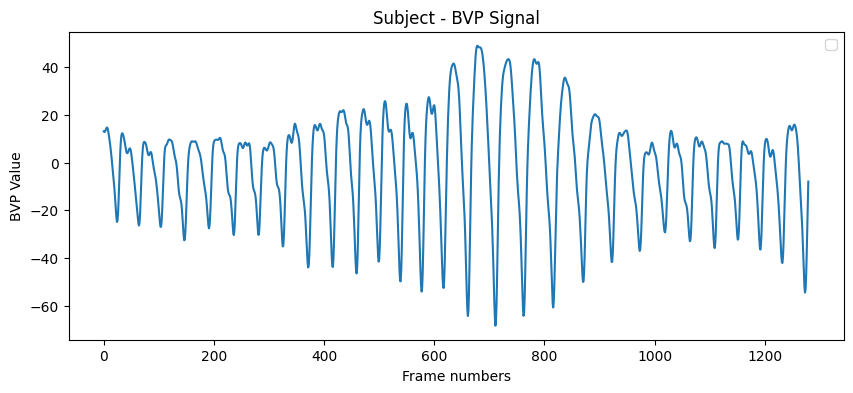

In [121]:
#Plot the ground truth data  
plt.figure(figsize=(10,4))
plt.plot(ref_rppg_signal)
plt.xlabel('Frame numbers')
plt.ylabel('BVP Value')
plt.title('Subject - BVP Signal')
plt.legend()
plt.show()

In [122]:
# Method 1- Estimating the BPM from filtered rPPG signal 
# Detect peaks in the filtered rPPG signal to estimate the heart rate

from scipy.signal import find_peaks

peaks, _ = find_peaks(ref_rppg_signal, distance=ref_fps/2)  # Minimum distance between peaks
peak_intervals = np.diff(peaks) / ref_fps  # Time intervals between peaks in seconds
heart_rate = 60.0 / np.mean(peak_intervals)  # Convert to beats per minute (bpm)

print(f"Estimated Heart Rate: {heart_rate:.2f} bpm")


Estimated Heart Rate: 83.08 bpm


1280


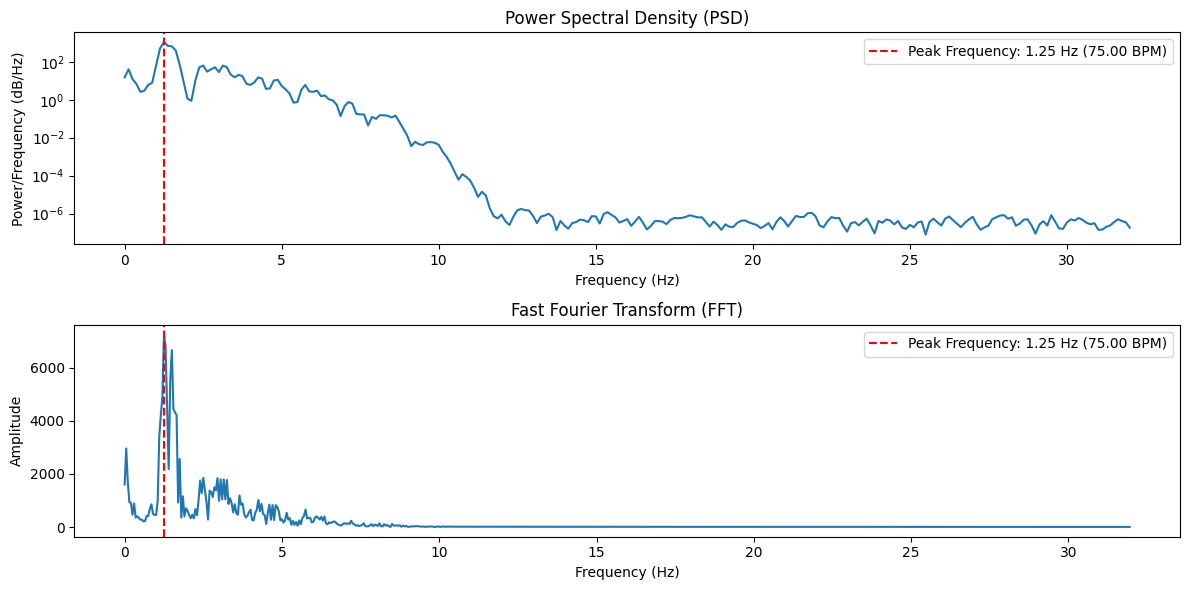

Estimated Heart Rate from PSD: 75.00 bpm
Estimated Heart Rate from FFT: 75.00 bpm


In [126]:
# Method 2- Estimating the BPM from Fast Fourier Transform(FFT) and Power Spectral Density(PSD) plot

from scipy.signal import welch

# Compute and plot the PSD.......................
frequencies_psd, psd = welch(ref_rppg_signal, ref_fps, nperseg=512)

# Find the peak frequency in the PSD within the heart rate range
peak_freq_psd = frequencies_psd[np.argmax(psd)]
bpm_psd = peak_freq_psd * 60

# Compute and plot the FFT.............................
n = len(ref_rppg_signal)
print(n)
frequencies_fft = np.fft.fftfreq(n, 1/ref_fps)
fft_values = np.fft.fft(ref_rppg_signal)
fft_amplitude = np.abs(fft_values)

# Find the peak frequency in the FFT within the heart rate range
heart_rate_range = (frequencies_fft >= 0.5) & (frequencies_fft <= 4.0)
peak_freq_fft = frequencies_fft[heart_rate_range][np.argmax(fft_amplitude[heart_rate_range])]
bpm_fft = peak_freq_fft * 60

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.semilogy(frequencies_psd, psd)
plt.title('Power Spectral Density (PSD)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.axvline(x=peak_freq_psd, color='r', linestyle='--', label=f'Peak Frequency: {peak_freq_psd:.2f} Hz ({bpm_psd:.2f} BPM)')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(frequencies_fft[:n//2], fft_amplitude[:n//2])  # Only plot the positive frequencies
plt.title('Fast Fourier Transform (FFT)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.axvline(x=peak_freq_fft, color='r', linestyle='--', label=f'Peak Frequency: {peak_freq_fft:.2f} Hz ({bpm_fft:.2f} BPM)')
plt.legend()

plt.tight_layout()
plt.show() 

print(f"Estimated Heart Rate from PSD: {bpm_psd:.2f} bpm")
print(f"Estimated Heart Rate from FFT: {bpm_fft:.2f} bpm")

### Plot the reference and estimated BPM over time .............................

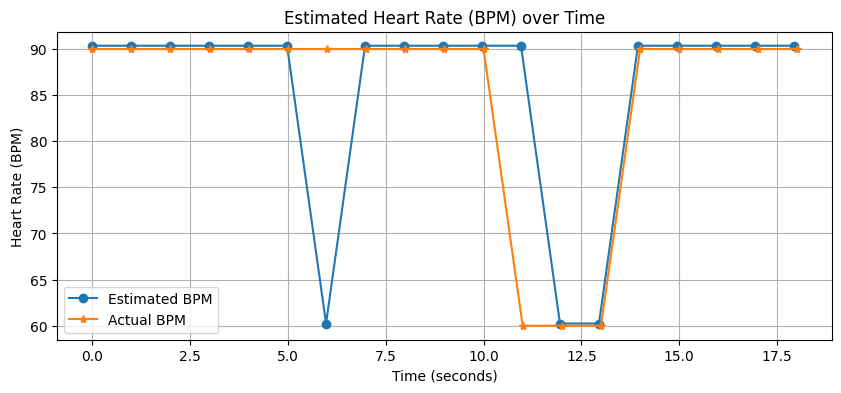

In [127]:
# Estimate the BPM from reference rPPG signal using sliding window and Welch's method

from scipy.signal import welch

def calculate_bpm_over_time(rppg_signal, fs, window_length, step_size):
    bpm_values = []
    time_stamps = []
    window_samples = int(window_length * fs)
    step_samples = int(step_size * fs)
    
    for start in range(0, len(rppg_signal) - window_samples + 1, step_samples):
        segment = rppg_signal[start:start + window_samples]
        
        # Compute PSD using Welch's method
        freqs, psd = welch(segment, fs, nperseg=window_samples)
        
        # Limit the frequency range to typical heart rate range (0.5 to 4 Hz)
        valid_idx = np.logical_and(freqs >= 0.5, freqs <= 3.0)
        valid_freqs = freqs[valid_idx]
        valid_psd = psd[valid_idx]
        
        # Find the peak frequency in the valid range
        peak_freq = valid_freqs[np.argmax(valid_psd)]
        
        # Convert the peak frequency to BPM
        bpm = peak_freq * 60
        bpm_values.append(bpm)
        time_stamps.append(start / fs)
    
    return time_stamps, bpm_values


# Calculate BPM from the rPPG signal using a 2-second window with a 1-second step
window_length = 2  # seconds
step_size = 1  # seconds

time_stamps_ref, bpm_value_ref = calculate_bpm_over_time(ref_rppg_signal, ref_fps, window_length, step_size)

# Plotting the BPM values over time for both reference bpm and estimated bpm
plt.figure(figsize=(10, 4))
plt.plot(time_stamps, bpm_values_est, marker='o', label ="Estimated BPM")
plt.plot(time_stamps_ref, bpm_value_ref, marker='*', label ="Actual BPM")
plt.title('Estimated Heart Rate (BPM) over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Heart Rate (BPM)')
plt.legend()
plt.grid(True)
plt.show()
